Enter the degree of Rotation (between -180 and 180):  135
Enter the zooming factor (between 0.1 and 10):  2
How many pixels you want the image to be translated horizontally?  2
How many pixels you want the image to be translated vertically?  2


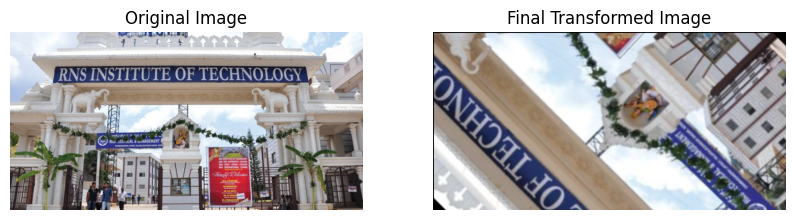

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def translate_image(image, dx, dy):
 rows, cols = image.shape[:2]
 translation_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
 translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
 return translated_image

image = cv2.imread("rnsit.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image.shape[:2]

center = (width // 2, height // 2)

rotation_value = int(input("Enter the degree of Rotation (between -180 and 180): "))
while rotation_value < -180 or rotation_value > 180:
 rotation_value = int(input("Invalid input. Enter the degree of Rotation (between -180 and 180): "))
scaling_value = float(input("Enter the zooming factor (between 0.1 and 10): "))
while scaling_value < 0.1 or scaling_value > 10:
 scaling_value = float(input("Invalid input. Enter the zooming factor (between 0.1 and 10): "))

rotated = cv2.getRotationMatrix2D(center=center, angle=rotation_value, scale=1)
rotated_image = cv2.warpAffine(src=image, M=rotated, dsize=(width, height))

scaled = cv2.getRotationMatrix2D(center=center, angle=0, scale=scaling_value)
scaled_image = cv2.warpAffine(src=rotated_image, M=scaled, dsize=(width, height))

h = int(input("How many pixels you want the image to be translated horizontally? "))
v = int(input("How many pixels you want the image to be translated vertically? "))

translated_image = translate_image(scaled_image, dx=h, dy=v)

translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)

cv2.imwrite('Final_image.png', translated_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(translated_image_rgb)
plt.title("Final Transformed Image")
plt.axis("off")
plt.show()